An insurance premium is an amount of money that an individual or a business pays to the insurance provider periodically. 
Whether you are investing in a home, life, or health, insurance premiums work more or less the same.

-----------------------------------------------------------------------------------------------------------------------------------

Insurance plans are beneficial to anyone looking to protect their family, assets/property and themselves from financial risk/losses: Insurance plans will help them to pay for medical emergencies, hospitalisation, contraction of any illnesses and treatment, and medical care required in the future.

---------------------------------------------------------------------------------------------------------------------------------------

Insurance Company determines the premium based on several factors related to the insured’s life i.e. age, gender, habits, medical history, profession to lessen their risk for which we are going to build a model.

--------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\iNeuron\Insurance_Price_Prediction\notebooks\data\insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
df.shape

(1338, 7)

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [10]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [12]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [13]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [14]:
numerical_cols=df.columns[df.dtypes!=object]

categorical_cols= df.columns[df.dtypes==object]

In [15]:
numerical_cols

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

In [16]:
df.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55


In [17]:
df[numerical_cols].corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [18]:
df[categorical_cols]["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [19]:
df[categorical_cols]["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [20]:
df[categorical_cols]["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

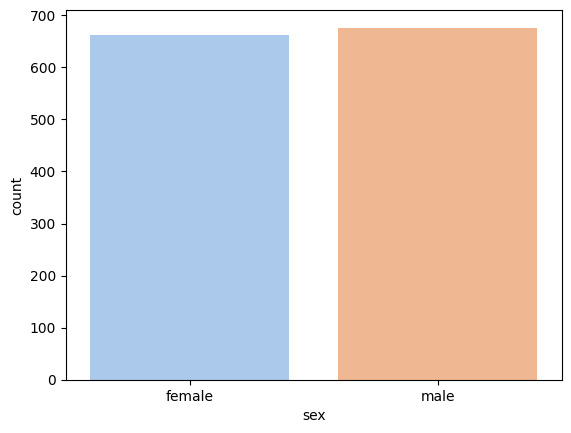

In [26]:
sns.countplot(data=df,x="sex",hue="sex",palette="pastel",legend=False)  

<Axes: xlabel='region', ylabel='count'>

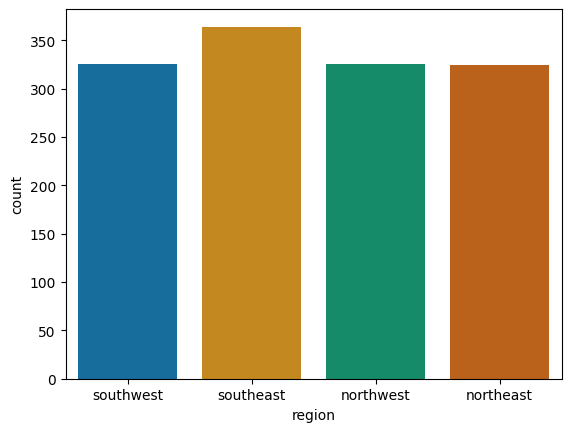

In [29]:
sns.countplot(data=df,x="region",hue="region",palette="colorblind",legend=False)  

<Axes: xlabel='smoker', ylabel='count'>

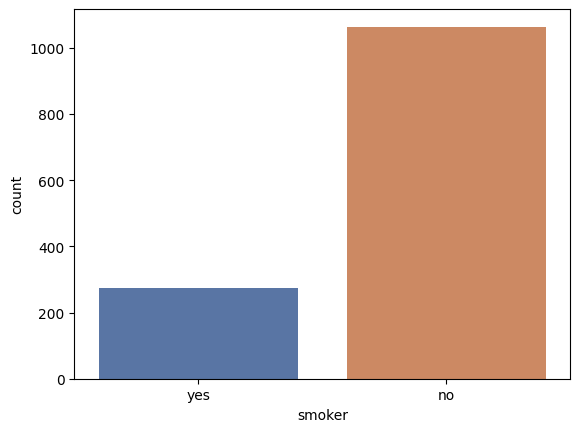

In [36]:
sns.countplot(data=df,x="smoker",hue="smoker",palette="deep",legend=False)  

In [37]:
categorical_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [38]:
numerical_cols

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

<Axes: xlabel='age', ylabel='Count'>

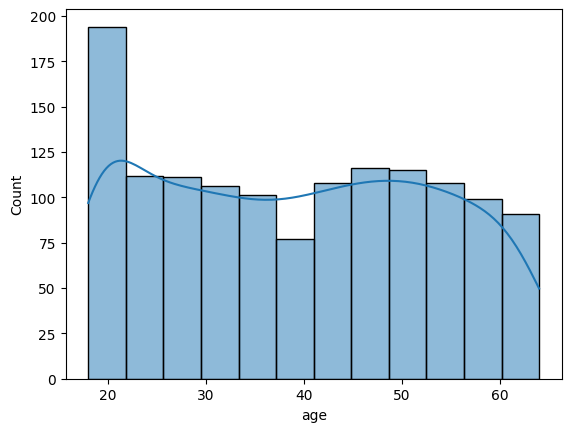

In [40]:
sns.histplot(data=df,x="age",kde=True)

In [41]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

<Axes: xlabel='children', ylabel='count'>

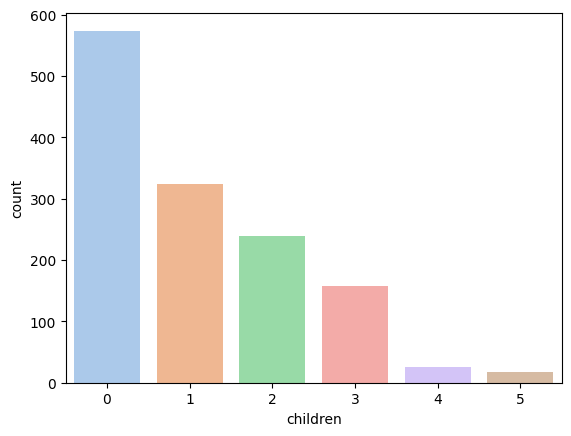

In [42]:
sns.countplot(data=df,x="children",hue="children",palette="pastel",legend=False)  

<Axes: xlabel='smoker', ylabel='expenses'>

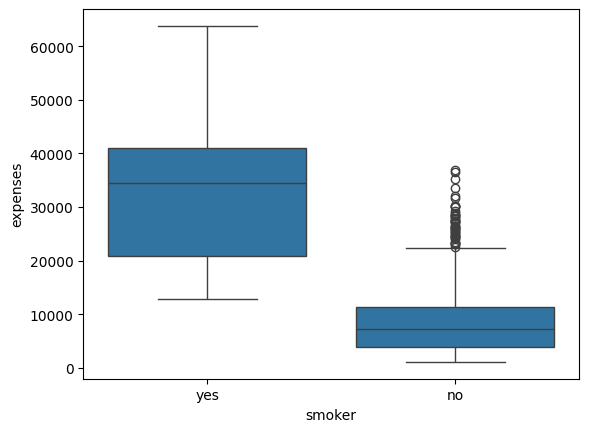

In [45]:
sns.boxplot(data=df, x="smoker", y="expenses")

<Axes: xlabel='region', ylabel='expenses'>

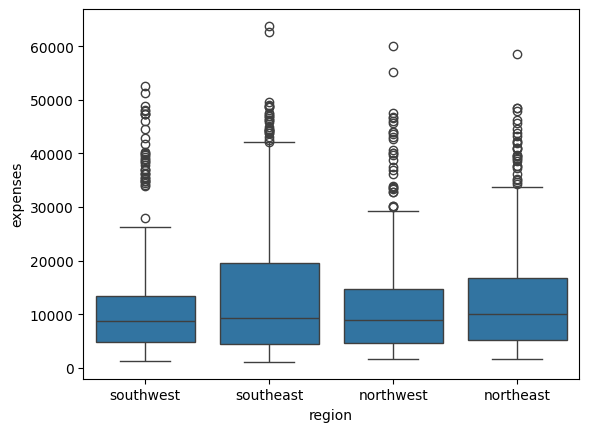

In [46]:
sns.boxplot(data=df, x="region", y="expenses")

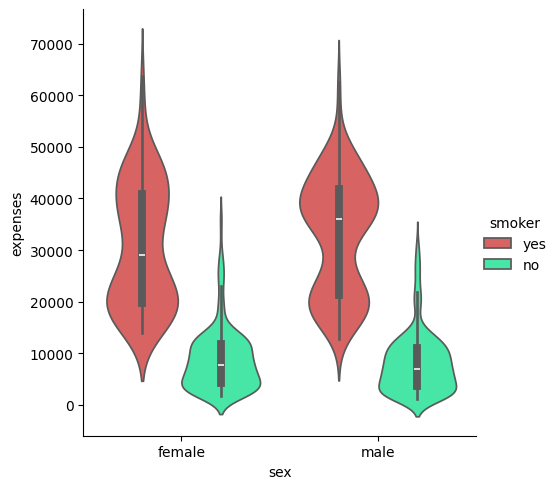

In [52]:
# Here, we are plotting violin plot related with sex & expenses with hue function on smoker Column.

palette=['#EB5050','#2DFFAB'] 
sns.catplot(x='sex', y='expenses', kind='violin', hue='smoker', palette=palette, data=df)

<Axes: xlabel='sex', ylabel='expenses'>

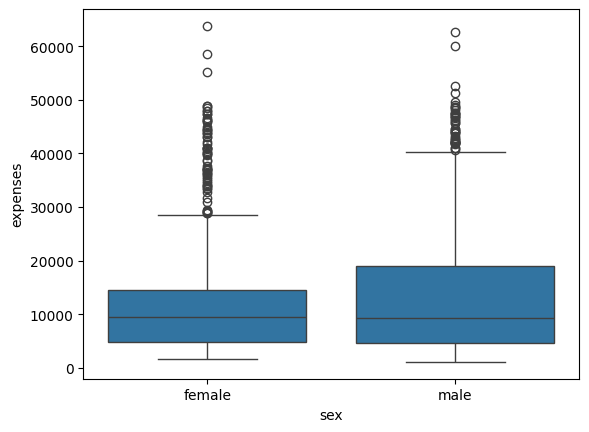

In [47]:
sns.boxplot(data=df, x="sex", y="expenses")

C:\Users\91983\AppData\Local\Temp\ipykernel_20376\3625210977.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['expenses'], fit=norm)


Text(0.5, 1.0, 'Distribution of Charges')

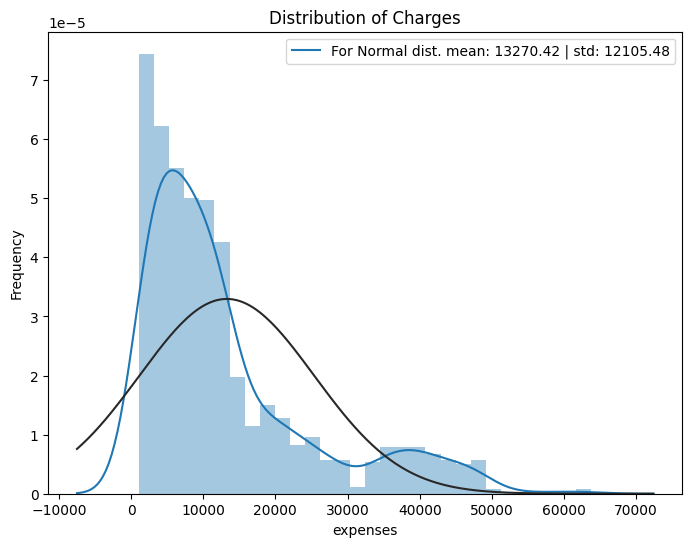

In [53]:
## Lets plot distribution plot on Expenses columns and check distribution related with  m   ean and S.D.

from scipy import stats
from scipy.stats import norm
fig =plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(df['expenses'], fit=norm)
(mu,sigma)= norm.fit(df['expenses'])
plt.legend(['For Normal dist. mean: {:.2f} | std: {:.2f}'.format(mu,sigma)])
plt.ylabel('Frequency')
plt.title('Distribution of Charges')